# Handwritten Digit Classification using a simple Neural n/w

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [4]:
print(f"Length of X_train: {len(X_train)}")
print(f"Length of X_test: {len(X_test)}")

Length of X_train: 60000
Length of X_test: 10000


In [5]:
print(f"Shape of a Sample in X_train: {X_train[0].shape}")

Shape of a Sample in X_train: (28, 28)


In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

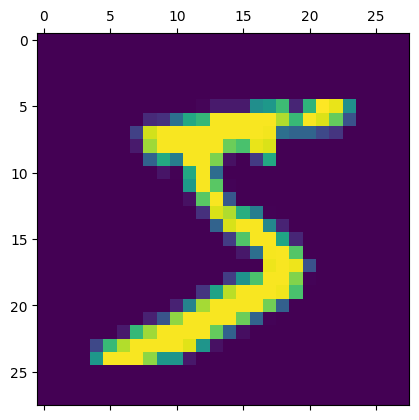

In [7]:
plt.matshow(X_train[0])

In [8]:
print(f"Checking the output: {y_train[0]}")
print(f"First 10 outputs: {y_train[:10]}")

Checking the output: 5
First 10 outputs: [5 0 4 1 9 2 1 3 1 4]


## Manual Scaling

In [9]:
X_train = X_train / 255
X_test = X_test / 255

X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Model

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # 28*28 = 784
    # Used for making a 2D array of 28x28 pixels into a 1D array of 784 pixels.
    
    keras.layers.Dense(100, activation='relu'), # 100 neurons in hidden layer
    keras.layers.Dense(10, activation='sigmoid') # 10 neurons in output layer
])

model.compile(
    optimizer = 'SGD',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)

model.fit(X_train, y_train, epochs=5, callbacks=[tb_callback])

print("********************************************************************")
print(f"Accuracy of model w.r.t test data: {model.evaluate(X_test, y_test)}")

c:\Users\Hp\Documents\GitHub\practice-dl\env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7350 - loss: 1.0270
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9014 - loss: 0.3568
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9146 - loss: 0.2998
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9254 - loss: 0.2651
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9317 - loss: 0.2400
********************************************************************
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9277 - loss: 0.2523
Accuracy of model w.r.t test data: [0.21986858546733856, 0.9370999932289124]


## To run Tensorboard in cli

In [11]:
# tensorboard --logdir logs/

## To run Tensorboard in notebook (not recommended)

In [12]:
# %load_ext tensorboard
# %tensorboard --logdir logs/fit

In [13]:
model.get_weights()

[array([[-0.04767455, -0.06142246,  0.06118047, ...,  0.0162383 ,
         -0.03002108, -0.00738493],
        [ 0.04171395,  0.01418535, -0.0721724 , ..., -0.04409967,
          0.07193375,  0.06686194],
        [ 0.01981992,  0.02607713, -0.01088572, ..., -0.05491536,
         -0.06782479, -0.00608715],
        ...,
        [ 0.07333122, -0.07040117,  0.01194384, ...,  0.00668959,
         -0.01638405,  0.02483417],
        [-0.02923995,  0.05801171, -0.07903965, ...,  0.03644421,
         -0.03721672, -0.0388758 ],
        [ 0.05334204, -0.00027902, -0.07424062, ..., -0.05129947,
         -0.05708421,  0.00783764]], dtype=float32),
 array([ 0.03664154, -0.0003002 , -0.02078998,  0.00021994,  0.02666283,
         0.11038855,  0.04493269,  0.05207647, -0.01713501,  0.03022993,
         0.06449915,  0.07877343,  0.03656286, -0.07595575,  0.032136  ,
         0.0137563 ,  0.13398792, -0.00657526,  0.02942174,  0.05831037,
         0.0684323 , -0.05016691, -0.0173713 , -0.0066324 , -0.004

## Evaluation

In [14]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1000us/step - accuracy: 0.9277 - loss: 0.2523


[0.21986858546733856, 0.9370999932289124]

## Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[0.6481223  0.0076615  0.89830583 0.98234046 0.02334997 0.61599576
 0.00232788 0.9999402  0.21353064 0.87334883]
7
[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
tf.Tensor(
[[ 964    0    1    1    0    4    8    1    1    0]
 [   0 1109    2    2    1    1    4    2   14    0]
 [   8    3  949   15    9    2   11   10   22    3]
 [   3    1   19  924    1   27    1   10   16    8]
 [   1    1    4    0  927    1   11    2    5   30]
 [   9    2    0   20    3  814   17    3   17    7]
 [  12    3    4    0    9   12  915    1    2    0]
 [   3    6   23    5    5    1    0  954    4   27]
 [   5    3    4   15    7   18   11    8  896    7]
 [  12    7    0   10   32    6    1   15    7  919]], shape=(10, 10), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

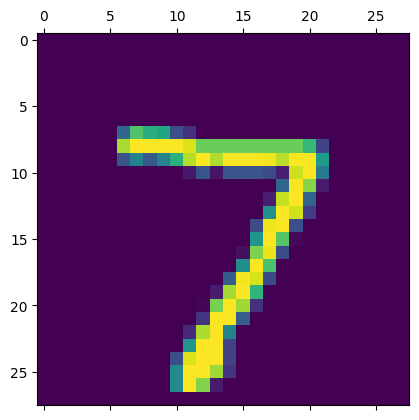

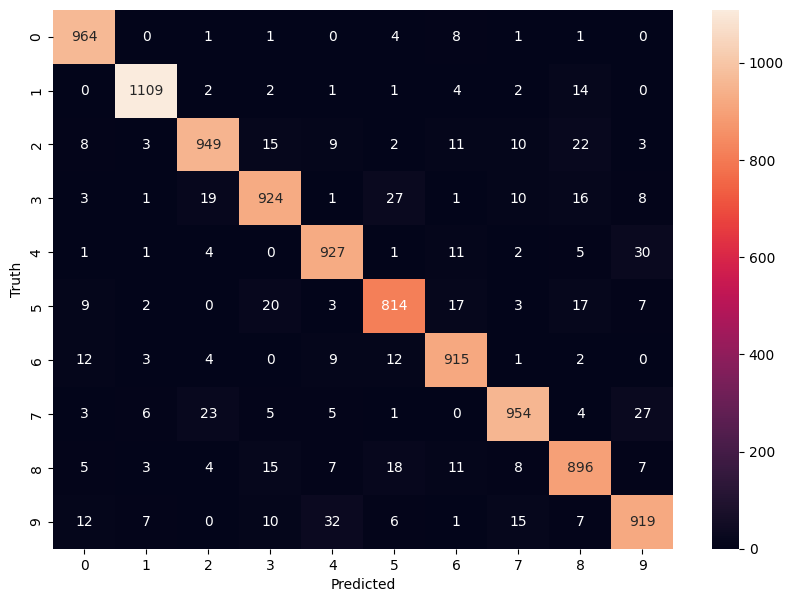

In [15]:
import seaborn as sn

y_pred = model.predict(X_test)
print(y_pred[0])
print(np.argmax(y_pred[0]))

plt.matshow(X_test[0])

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels[:10])

cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred_labels)
print(cm)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')